<img src="Figures/top_ML.png" alt="Drawing" style="width: 1000px;"/>

# Desbalanceo de clases

La variable objetivo (Clase/ Etiqueta) **diabetes_binaria** tiene 2 clases:
* 0 es para no tener diabetes
* 1 es para prediabetes o diabetes.

Este conjunto de datos tiene 21 variables de características y **no está equilibrado**.

[Enlace al dataset](#https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)

### Cargar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### Cargar datos

In [2]:
data = pd.read_csv('Data/S4_diabetes_desequilibrio_clases.csv')
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

### Visualizar el desequilibrio de clases

Número total de etiquetas:  [218334  35346]


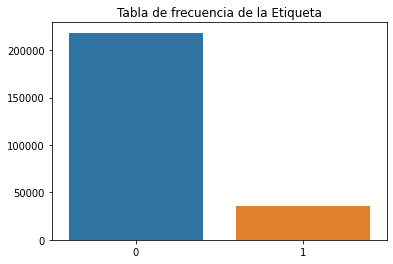

In [4]:
x = data['Diabetes_binary'].value_counts().values
sns.barplot([0,1],x)
plt.title('Tabla de frecuencia de la Etiqueta')
print('Número total de etiquetas: ', x)

* Es evidente que existe un problema de desequilibrio de clases.
* Más adelante en este cuaderno estudiaremos los métodos para resolver este problema.

# Soluciones

## 1. Resampling 

Una técnica ampliamente adoptada para tratar conjuntos de datos muy desequilibrados se denomina remuestreo. Consiste en eliminar muestras de la clase mayoritaria (submuestreo) y/o añadir más ejemplos de la clase minoritaria (sobremuestreo).

<img src="Figures/resampling.png" alt="Drawing" style="width: 800px;"/>


### **1.1 Oversampling de la clase minoritaria**

El sobremuestreo puede definirse como añadir más copias de la clase minoritaria. El sobremuestreo puede ser una buena opción cuando no se tiene muchos datos con los que trabajar.

Utilizaremos el módulo de remuestreo de Scikit-Learn para replicar aleatoriamente muestras de la clase minoritaria.

In [5]:

no_diabetes = data[data.Diabetes_binary == 0]
diabetes = data[data.Diabetes_binary == 1]

# upsample minority
diabetes_upsampled = resample(diabetes,
                          replace=True, # sample with replacement
                          n_samples=len(no_diabetes), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([no_diabetes, diabetes_upsampled])

In [6]:
upsampled

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202672,1.0,1.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,6.0,5.0
58011,1.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,24.0,0.0,0.0,13.0,5.0,4.0
195556,1.0,1.0,1.0,1.0,25.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,5.0,5.0,30.0,1.0,1.0,10.0,5.0,6.0
145396,1.0,1.0,1.0,1.0,52.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,9.0,6.0,8.0


Número total de etiquetas:  [218334 218334]


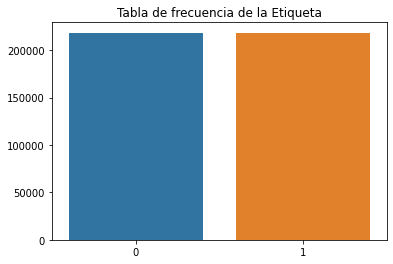

In [7]:
x = upsampled['Diabetes_binary'].value_counts().values
sns.barplot([0,1],x)
plt.title('Tabla de frecuencia de la Etiqueta')
print('Número total de etiquetas: ', x)

### **1.2 Undersampling la clase mayoritaria**

El submuestreo puede definirse como la eliminación de algunas observaciones de la clase mayoritaria. El submuestreo puede ser una buena opción cuando se dispone de una gran cantidad de datos, por ejemplo, millones de filas. Pero el inconveniente es que estamos eliminando información que puede ser valiosa. Esto podría conducir a un ajuste insuficiente y a una mala generalización en el conjunto de pruebas.


In [8]:
no_diabetes_downsampled = resample(no_diabetes,
                                replace = False, # sample without replacement
                                n_samples = len(diabetes), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([no_diabetes_downsampled, diabetes])

# checking counts
downsampled.Diabetes_binary.value_counts()

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

Número total de etiquetas:  [35346 35346]


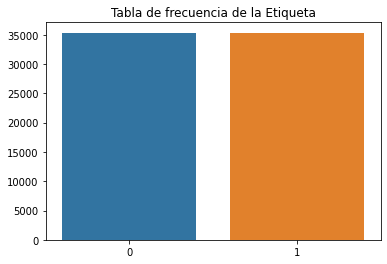

In [9]:
x = downsampled['Diabetes_binary'].value_counts().values
sns.barplot([0,1],x)
plt.title('Tabla de frecuencia de la Etiqueta')
print('Número total de etiquetas: ', x)

## 2. Datos sintéticos

En la literatura se han propuesto varias técnicas de remuestreo más sofisticadas.

Por ejemplo, en el sobremuestreo, en lugar de crear copias exactas de los registros de la clase minoritaria, podemos introducir pequeñas variaciones en esas copias, creando muestras sintéticas más diversas.

Vamos a aplicar esta técnica de remuestreo (creación de datos sintéticos), utilizando la biblioteca de Python **[imbalanced-learn](https://imbalanced-learn.org/stable/)**. Es compatible con scikit-learn y forma parte de los proyectos scikit-learn-contrib.

In [10]:
!pip install imblearn

In [11]:
import imblearn
X = data.drop('Diabetes_binary',axis=1)
y_np = data['Diabetes_binary']

X_train, X_test, y_train, y_test=train_test_split(X, y_np, test_size=.2,random_state=1)


In [12]:
y = pd.DataFrame(y_np, columns=['Diabetes_binary'])


### Over-sampling: SMOTE

SMOTE (Synthetic Minority Oversampling TEchnique) consiste en sintetizar elementos para la clase minoritaria, basándose en los que ya existen. Funciona eligiendo aleatoriamente un punto de la clase minoritaria y calculando los k vecinos más cercanos para este punto. Los puntos sintéticos se añaden entre el punto elegido y sus vecinos.

<img src="Figures/SMOTE.png" alt="Drawing" style="width: 400px"/>


## 3. Cambiar la métrica

Como hemos visto anteriormente, el acierto (Accuracy) no es la mejor métrica para evaluar conjuntos de datos desequilibrados, ya que puede ser engañosa. Entre las métricas que pueden proporcionar una mejor visión se encuentran:

* **Matriz de confusión**: una tabla que muestra las predicciones correctas y los tipos de predicciones incorrectas.

* **Precisión**: el número de verdaderos positivos dividido por todas las predicciones positivas. La precisión también se denomina valor predictivo positivo. Es una medida de la exactitud de un clasificador. Una precisión baja indica un elevado número de falsos positivos.

* **Recall**: el número de verdaderos positivos dividido por el número de valores positivos en los datos de prueba.También se denomina sensibilidad o tasa de verdaderos positivos. Es una medida de la exhaustividad de un clasificador. Un recall bajo indica un alto número de falsos negativos.

* **Puntuación F1**: la media ponderada de la precisión y la recuperación.
